In [1]:
import json 
import numpy as np 
import pandas as pd 

In [2]:
pwd

'/app/timeseries/multiclass_src/notebooks'

# 1. Reading in from eval json

In [41]:
def load_eval_json(eval_file): 
#     results_path = "/app/timeseries/multiclass_src/results/new_runs/analysis"
    results_path = "/app/timeseries/multiclass_src/results/new_runs/"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [42]:
# af1_results = load_eval_json(eval_file="20201220-cifar-af1-imb.json")
# ce_results = load_eval_json(eval_file="20201220-cifar-ce-imb.json")
af1_results = load_eval_json(eval_file="20201211_approxf1_eval.json")
ce_results = load_eval_json(eval_file="20201211_ce_eval.json")

In [43]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape
    This aggregates an array of jsons together into a singular one, based on the set fields below
    '''
    eval_json = {}
    eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
    for tau in eval_taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        class_pr = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(class_pr, axis=0)
        eval_json[str(tau)]['mean_pr'] = np.mean(eval_json[str(tau)]['class_precisions'])
        
        class_re = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(class_re, axis=0)
        eval_json[str(tau)]['mean_re'] = np.mean(eval_json[str(tau)]['class_recalls'])
    return eval_json 

In [44]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [45]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
af1_pr = [af1_agg[x]['mean_pr'] for x in af1_agg]
af1_re = [af1_agg[x]['mean_re'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]
ce_pr = [ce_agg[x]['mean_pr'] for x in ce_agg]
ce_re = [ce_agg[x]['mean_re'] for x in ce_agg]

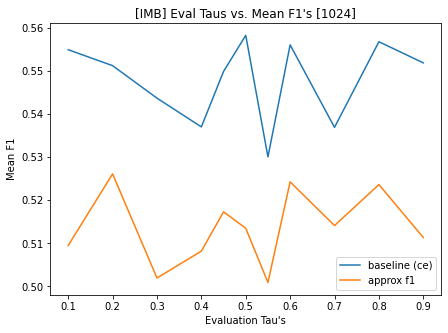

In [46]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("[IMB] Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

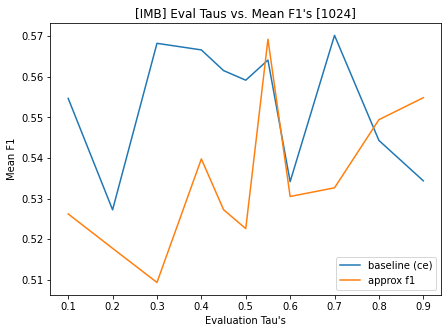

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("[IMB] Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

In [23]:
print(np.mean(ce_f1s))
print(np.mean(af1_f1s))

0.5531614964658563
0.5345118641853333


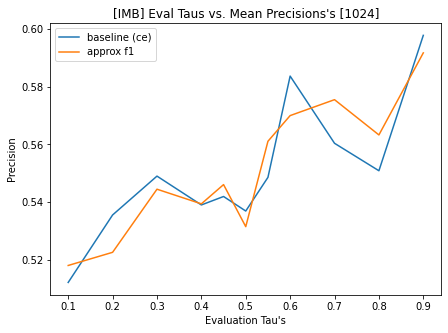

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_pr, label="baseline (ce)")
plt.plot(taus, af1_pr, label="approx f1")
plt.title("[IMB] Eval Taus vs. Mean Precisions's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Precision")
plt.legend()
plt.show()

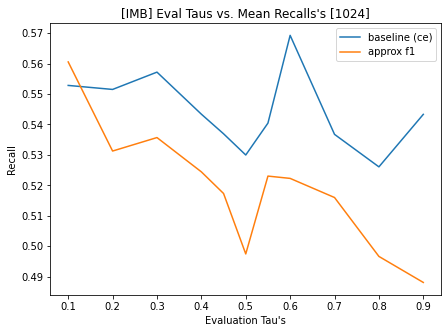

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_re, label="baseline (ce)")
plt.plot(taus, af1_re, label="approx f1")
plt.title("[IMB] Eval Taus vs. Mean Recalls's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Recall")
plt.legend()
plt.show()

# Thresholding

In [24]:
agg = {
        "0.1": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.125": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.2": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.3": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.4": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.5": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.6": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.7": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.8": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }, 
        "0.9": {
        "0.1": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.2": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.3": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.4": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.45": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.5": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.55": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.6": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.7": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.8": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]},
        "0.9": {"mean_f1":0,"class_f1s":[0,0,0,0,0,0,0,0,0,0],"class_precisions":[0,0,0,0,0,0,0,0,0,0],"class_recalls":[0,0,0,0,0,0,0,0,0,0]}
    }
}

In [25]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/train_tau/20201216"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [26]:
train_tau_res = load_eval_json("v2_imbalanced_results.json")

In [27]:
train_taus = ['0.1', '0.125', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']

In [31]:
num_runs = float(len(train_tau_res))
print(num_runs)

3.0


In [33]:
num_runs = float(len(train_tau_res))
for run in train_tau_res:
    # for each trained model 
    for train_tau in train_taus: 
        # for each eval threshold 
        for eval_tau in eval_taus:
            
            agg[train_tau][eval_tau]['mean_f1'] += run[train_tau][eval_tau]['mean_f1']  / num_runs
            class_f1s = agg[train_tau][eval_tau]['class_f1s']
            adj_f1s = [x/num_runs for x in run[train_tau][eval_tau]['class_f1s']] 
            agg[train_tau][eval_tau]['class_f1s'] = np.add(
                class_f1s, adj_f1s)
            
            class_precisions = agg[train_tau][eval_tau]['class_precisions']
            adj_prec = [x/num_runs for x in run[train_tau][eval_tau]['class_precisions']] 
            agg[train_tau][eval_tau]['class_precisions'] = np.add(
                class_precisions, adj_prec)
            
            class_recalls = agg[train_tau][eval_tau]['class_recalls']
            adj_rec = [x/num_runs for x in run[train_tau][eval_tau]['class_recalls']] 
            agg[train_tau][eval_tau]['class_recalls'] = np.add(
                class_recalls, adj_rec)
            
            

In [34]:
for train_tau in train_taus: 
    for eval_tau in eval_taus: 
        agg[train_tau][eval_tau]['class_f1s'] = list(agg[train_tau][eval_tau]['class_f1s'])
        agg[train_tau][eval_tau]['class_recalls'] = list(agg[train_tau][eval_tau]['class_recalls'])
        agg[train_tau][eval_tau]['class_precisions'] = list(agg[train_tau][eval_tau]['class_precisions'])

In [35]:
eval_agg = {"0.1":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.2":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.3":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.4":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.45":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.5":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.55":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.6":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.7":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.8":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}, 
            "0.9":{'class_f1s':[0,0,0,0,0,0,0,0,0,0]}}

In [36]:
train_taus = ['0.1', '0.125', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
for etau in eval_taus: 
    for i in range(10): 
        # for the all the trained models (at eval threshold 0.1), store the 
        holder = [agg[x][etau]['class_f1s'][i] for x in train_taus]
        eval_agg[etau]['class_f1s'][i] = max(holder)
        print("For Eval {}, Class {} picked {}".format(etau, i+1, train_taus[holder.index(max(holder))]))

For Eval 0.1, Class 1 picked 0.125
For Eval 0.1, Class 2 picked 0.5
For Eval 0.1, Class 3 picked 0.6
For Eval 0.1, Class 4 picked 0.2
For Eval 0.1, Class 5 picked 0.2
For Eval 0.1, Class 6 picked 0.7
For Eval 0.1, Class 7 picked 0.5
For Eval 0.1, Class 8 picked 0.6
For Eval 0.1, Class 9 picked 0.8
For Eval 0.1, Class 10 picked 0.5
For Eval 0.2, Class 1 picked 0.6
For Eval 0.2, Class 2 picked 0.2
For Eval 0.2, Class 3 picked 0.5
For Eval 0.2, Class 4 picked 0.2
For Eval 0.2, Class 5 picked 0.7
For Eval 0.2, Class 6 picked 0.125
For Eval 0.2, Class 7 picked 0.5
For Eval 0.2, Class 8 picked 0.125
For Eval 0.2, Class 9 picked 0.7
For Eval 0.2, Class 10 picked 0.2
For Eval 0.3, Class 1 picked 0.5
For Eval 0.3, Class 2 picked 0.125
For Eval 0.3, Class 3 picked 0.7
For Eval 0.3, Class 4 picked 0.7
For Eval 0.3, Class 5 picked 0.6
For Eval 0.3, Class 6 picked 0.6
For Eval 0.3, Class 7 picked 0.5
For Eval 0.3, Class 8 picked 0.5
For Eval 0.3, Class 9 picked 0.8
For Eval 0.3, Class 10 picked 0.5

In [37]:
final_agg = {"0.1":0, "0.2":0, "0.3":0, "0.4":0, "0.45":0, "0.5":0, "0.55":0, "0.6":0, "0.7":0, "0.8":0, "0.9":0}
variance = {"0.1":0, "0.2":0, "0.3":0, "0.4":0, "0.45":0, "0.5":0, "0.55":0, "0.6":0, "0.7":0, "0.8":0, "0.9":0}

In [38]:
for etau in eval_taus: 
    final_agg[etau] = np.array(eval_agg[etau]['class_f1s']).mean()
    variance[etau] = np.array(eval_agg[etau]['class_f1s']).var()

In [39]:
final_agg_arr = [final_agg[etau] for etau in eval_taus]

In [57]:
poc = [0.5500030855337779,
 0.5613434493541717,
 0.5594184319178263,
 0.5640014042456943,
 0.565955180923144,
 0.5613971859216689,
 0.5553698420524598,
 0.5554081588983536,
 0.5500029375155767,
 0.5422840754191081,
 0.5317232569058736]

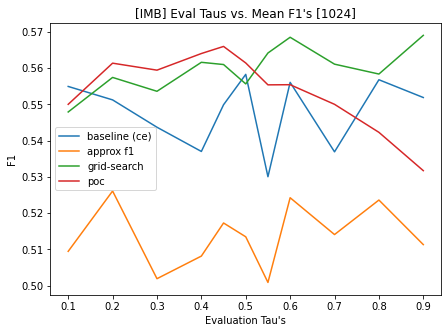

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.plot(taus, final_agg_arr, label="grid-search")
plt.plot(taus, poc, label="poc")
plt.title("[IMB] Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("F1")
plt.legend()
plt.show()

In [50]:
np.mean(ce_f1s)

0.5478797338225625

In [51]:
np.mean(af1_f1s)

0.5137087883371295

In [52]:
np.mean(final_agg_arr)

0.5598308773654881

In [56]:
np.mean(poc)

NameError: name 'poc' is not defined